## Coding sprint (15/12)
## Task:
Predict 'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)' from other World development indicators
https://datacatalog.worldbank.org/home

### Group 1
https://pypi.org/project/wbgapi/
1. Access world bank data via python API, wbgapi
2. Get the alcohol indicator, and search other indicators (year 2019)
3. Your final product is pandas DataFrame containing 10 relevant indicators of your choice

### Group 2
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
1. Your input is the DF from the above
2. Solve the problem with missing values (what are you going to do? substitute, invent a value, ignore a country?)
3. Find 5 best candidate predictors of the alcohol comsuption out of the 10 in the table

### Group 3
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
1. Your input is Dataframe with 5 predictors (features) and target alcohol column.
2. Split the data into train and test.
3. prepare a linear regression model (scikit learn LinearRegression()) to fit the data
5. Find evaluation metrics of the model.
6. Predict the test data. How is the performance between train and test?

In [1]:
import wbgapi as wb
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn import model_selection
from sklearn import linear_model

In [2]:
# help(wb.series)

In [3]:
wb.search('alcohol')

ID,Name,Field,Value
EG.CFT.ACCS.RU.ZS,,Statisticalconceptandmethodology,"...fuels, electricity, as well as an aggregation of any other clean fuels like alcohol) are produced by aggregating estimates of relevant fuel types. The model was..."
EG.CFT.ACCS.UR.ZS,,Statisticalconceptandmethodology,"...fuels, electricity, as well as an aggregation of any other clean fuels like alcohol) are produced by aggregating estimates of relevant fuel types. The model was..."
EG.CFT.ACCS.ZS,,Statisticalconceptandmethodology,"...fuels, electricity, as well as an aggregation of any other clean fuels like alcohol) are produced by aggregating estimates of relevant fuel types. The model was..."
SH.ALC.PCAP.FE.LI,,Developmentrelevance,"...Acoording to the World Health Organization, alcohol consumption is a causal factor in more than 200 disease and injury conditions...."
SH.ALC.PCAP.FE.LI,,IndicatorName,"Total alcohol consumption per capita, female (liters of pure alcohol, projected estimates, female 15+ years of age)"
SH.ALC.PCAP.FE.LI,,Longdefinition,...Total alcohol per capita consumption is defined as the total (sum of recorded and unrecorded...
SH.ALC.PCAP.FE.LI,,Statisticalconceptandmethodology,...The estimates for the total alcohol consumption are produced by summing up the 3-year average per capita (15+)...
SH.ALC.PCAP.LI,,Developmentrelevance,"...Acoording to the World Health Organization, alcohol consumption is a causal factor in more than 200 disease and injury conditions...."
SH.ALC.PCAP.LI,,IndicatorName,"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)"
SH.ALC.PCAP.LI,,Longdefinition,...Total alcohol per capita consumption is defined as the total (sum of recorded and unrecorded...


In [6]:
wb.series.info(q='alcohol')

id,value
SH.ALC.PCAP.FE.LI,"Total alcohol consumption per capita, female (liters of pure alcohol, projected estimates, female 15+ years of age)"
SH.ALC.PCAP.LI,"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)"
SH.ALC.PCAP.MA.LI,"Total alcohol consumption per capita, male (liters of pure alcohol, projected estimates, male 15+ years of age)"
,3 elements


In [9]:
wb.source.concepts(db=57)

{'economy': {'key': 'country', 'value': 'Country'},
 'series': {'key': 'series', 'value': 'Series'},
 'time': {'key': 'time', 'value': 'Time'},
 'version': {'key': 'version', 'value': 'Version'}}

In [ ]:
# save indicators from worldbank in dataframe:
# 'IQ.CPA.PROT.XQ'
# 'SE.ADT.1524.LT.FE.ZS'
# 'EN.ATM.CO2E.PC'
# alcohol consumption: 'SH.ALC.PCAP.LI'
df = wb.data.DataFrame(['IQ.CPA.PROT.XQ', 'SE.ADT.1524.LT.FE.ZS', 'EN.ATM.CO2E.PC', 'SH.ALC.PCAP.LI'], labels=False, mrv=5).reset_index()

In [ ]:
def filter_wdi_years(data_id, number_years):
    # gets the dataframe

    # search column by column

    # find column with most valid values#

    return year

In [32]:
# show the dataframe
df.head()

,economy,series,YR2018,YR2019,YR2020,YR2021,YR2022
0,ABW,EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN
1,ABW,IQ.CPA.PROT.XQ,NaN,NaN,NaN,NaN,NaN
2,ABW,SE.ADT.1524.LT.FE.ZS,NaN,NaN,99.410004,NaN,NaN
3,ABW,SH.ALC.PCAP.LI,NaN,NaN,NaN,NaN,NaN
4,AFE,EN.ATM.CO2E.PC,0.921453,0.915294,0.795420,NaN,NaN


In [33]:
data_sets = wb.series.info()

In [34]:
df = wb.data.DataFrame('IQ.CPA.PROT.XQ', labels=False, mrv=5).reset_index()

In [36]:
df.head()

,economy,YR2018,YR2019,YR2020,YR2021,YR2022
0,ABW,NaN,NaN,NaN,NaN,NaN
1,AFE,2.916667,2.868421,2.894737,2.947368,2.947368
2,AFG,2.500000,2.500000,2.500000,NaN,1.500000
3,AFW,2.975000,2.975000,3.025000,3.050000,3.100000
4,AGO,NaN,NaN,NaN,NaN,NaN


In [47]:
df[df.columns[-1]].isna().sum()

151

In [53]:
type(df.isna().sum())

pandas.core.series.Series

In [54]:
idx = df.isna().sum()[-5:].argmin()

In [55]:
df.columns[idx]

'YR2018'

In [41]:
cols = [k for k in df.columns if k[:2]=='YR']

In [46]:
counter = 1e6
for i, col in enumerate(cols):
    if df[col].isna().sum() < counter:
        idx = i
    print(df[col].isna().sum())

151
149
152
153
151


In [44]:
cols[idx]

'YR2022'

In [24]:
data_sets['AG.AGR.TRAC.NO']

TypeError: 'Featureset' object is not subscriptable

In [30]:
# clear missing data 
df = df[-df.isnull().any(axis=1)]
# show the clean dataframe
df

,economy,EN.ATM.CO2E.PC,IQ.CPA.PROT.XQ,SE.ADT.1524.LT.FE.ZS,SH.ALC.PCAP.LI


In [27]:
len(df)

58

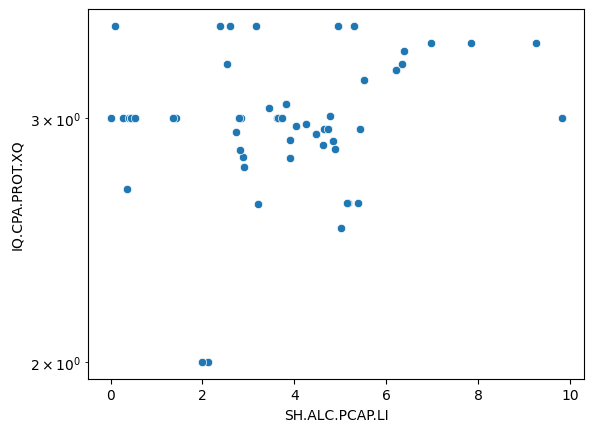

In [8]:
sns.scatterplot(data=df, x='SH.ALC.PCAP.LI', y='IQ.CPA.PROT.XQ')
plt.yscale('log')

In [9]:
# show confusion matrix to see correlation of indicators  
df[['IQ.CPA.PROT.XQ', 'SE.ADT.1524.LT.FE.ZS', 'EN.ATM.CO2E.PC', 'SH.ALC.PCAP.LI']].corr()

,IQ.CPA.PROT.XQ,SE.ADT.1524.LT.FE.ZS,EN.ATM.CO2E.PC,SH.ALC.PCAP.LI
IQ.CPA.PROT.XQ,1.000000,0.386229,0.209664,0.209870
SE.ADT.1524.LT.FE.ZS,0.386229,1.000000,0.578561,0.210982
EN.ATM.CO2E.PC,0.209664,0.578561,1.000000,0.435432
SH.ALC.PCAP.LI,0.209870,0.210982,0.435432,1.000000


In [10]:
# split data into training and testing set
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(df[df.columns[2:-1]], df[df.columns[-1]], test_size=0.1, random_state=42)

# fit the model 
reg = sklearn.linear_model.LinearRegression().fit(X_train, y_train)


In [11]:
# predict on the model
y_pred = reg.predict(X_test)

In [12]:
y_pred, y_test

(array([2.99613514, 3.51358277, 2.97189532, 3.6296929 , 4.13045431,
        4.63932104]),
 0      3.628090
 49     0.409130
 237    2.880603
 131    3.168600
 247    4.728616
 258    5.151493
 Name: SH.ALC.PCAP.LI, dtype: float64)

Text(0, 0.5, 'Real value')

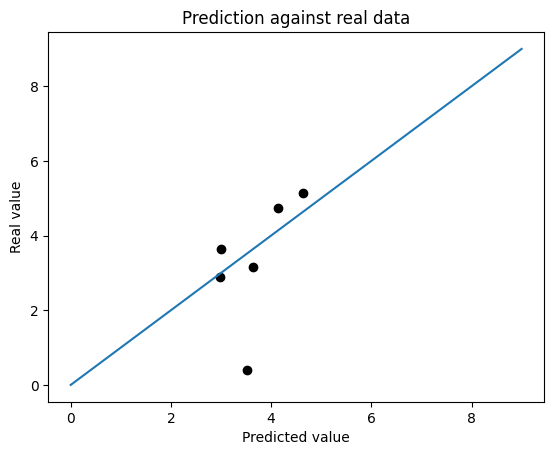

In [14]:
# plot the prediction on alcoholism against real data
plt.plot(y_pred, y_test, "ko")
plt.plot(range(10), range(10))
plt.title('Prediction against real data')
plt.xlabel('Predicted value')
plt.ylabel('Real value')